<center><font color="darkyellow" size="4"><b> ⚠️⚠️⚠️   &nbsp; &nbsp;! Pensez à faire une copie <u>dans votre drive</u> avant de commencer !  &nbsp; &nbsp;⚠️⚠️⚠️</b></font></center>

<center><font color="orange" size="6"><b>2- Les données structurées au format CSV 

Lecture, requêtes et Tris</b></font></center>




---

<center><font color="orange" size="6"><b>Graphiques</b></font></center>


---



⏬ Téléchargez maintenant le fichier [villes.csv](https://drive.google.com/file/d/1Zi_spru-r9J1TMTiT8lw18wTNya8hClw/view?usp=sharing) puis importez le dans la session. Il est trop volumineux pour un affichage rapide.... vous allez devoir travailler dessus pour savoir ce qu'il contient !

Nous reprenons la fonction readCSV du 1er TP

In [ ]:
import csv
def readCSV( filename:str ) -> list :
    '''
    Entrée : nom d'un fichier CSV
    Sortie : la fonction renvoie les données lues dans une liste de dictionnaires
    '''
    with open(filename, mode = "r" , encoding='utf-8' , newline = '') as csvFile :
        reader = csv.DictReader(csvFile)
        lu = [dict(ligne) for ligne in reader]
    print('nombre d\'enregistrements lus : ',len(lu) )
    return lu
    

<font color="orange" size="4">➽ Lire villes.csv et  créer la liste <u>*villes*</u> en utilisant notre fonction readCSV() :</font>

In [ ]:
# Avec la fonction readCSV() 
help(readCSV)
villes = readCSV('villes.csv')

Help on function readCSV in module __main__:

readCSV(filename: str) -> list
    Entrée : nom d'un fichier CSV
    Sortie : la fonction renvoie les données lues dans une liste de dictionnaires

nombre d'enregistrements lus :  36700


<font color="orange" size="6">➽ Modifier le type d'une ou plusieurs colonnes</font>

Dans l'exemple précédent, on a converti en int puis reconverti en str.

C'est un peu lourd et finalement, il serait plutôt judicieux de convertir en int ou float les colonnes numériques.

Téléchargez puis importez le fichier libCSV0.py 

Il contient une librairie (très limitée) de fonctions de traitement de listes de dictionnaires. Nous examinerons son contenu ultérieurement, nous allons d'abord voir comment utiliser une librairie en s'appuyant seulement sur help()

In [ ]:
from  libCSV0 import *

help(setColType)

Help on function setColType in module libCSV0:

setColType(lstDict: list, cle: str, typeOf: type) -> None
    Entrée : lstDict (liste de dictionnaire)
    cle : nom d'une clef des dictionnaires (str)
    typeOf : int, float, ou str : type dans lequel on souhaite encoder la colonne
    La fonction modifie par effet de bord la liste lstDict
    Le type d'une seule colonne est modifiée
    
    
    exemple :
    >>> neveux = [ {"nom" : "Riri" , "age" : "12" , "argent":"41.3"} ,
                {"nom" : "Fifi" , "age" : "15" , "argent":"21.0"} ,
                {"nom" : "Loulou" , "age" : "13" , "argent":"11.5"}]
    >>> lstTypes = { 'age' : int , 'argent' : float }
    >>> setColsTypes(neveux , 'age' , int )
    [ {"nom" : "Riri" , "age" : 12 , "argent":"41.3"} ,
                {"nom" : "Fifi" , "age" : 15 , "argent":"21.0"} ,
                {"nom" : "Loulou" , "age" : 13 , "argent":"11.5"}]
                
    # les éléments de la colonne age sont maintenant de types int.



<font color="orange" size="4">➽ Utilisez la fonction setColType pour convertir en int une colonne</font>

Convertir en int lES colonnes nb_hab_1999, nb_hab_2010 et nb_hab_2012



In [ ]:
setColType( villes , 'nb_hab_1999' , int )
setColType( villes , 'nb_hab_2010' , int )
setColType( villes , 'nb_hab_2012' , int )

In [ ]:
assert type(villes[0]['nb_hab_1999']) == int

<font color="orange" size="5"><b><center>Quelques graphiques</center></b></font>

Gérer des grandes quantités de données, extraire des informations, effectuer des calculs etc...

C'est très bien, mais la présentation de grandes quantités de données demande souvent de recourir à des graphiques. 

Ci-dessous, quelques graphiques pour vous familiariser avec la librairie matplotlib.

[2125851, 2243833, 2211000]


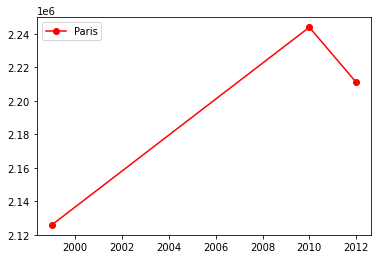

In [ ]:
# une courbe montrant la population de Paris en 1999, 2010 et 2012

# en abcisse :
annee = [1999,2010,2012]
# en ordonnée : créez la liste [n99,n2010,n2012] 
# avec le nombre d'hab chaque année à Paris
Paris = recherche(villes,'nom','Paris')[0]
habParis = [ Paris[c] for c in ['nb_hab_1999','nb_hab_2010','nb_hab_2012']]

# graphique
import matplotlib.pyplot as plt
plt.plot(annee, habParis, "ro-",label='Paris') 
# ro- signifie : (r)ed+(o)pen circle+(-)trait continu
plt.legend()

plt.show()

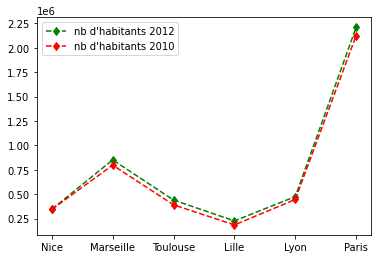

In [ ]:
# une courbe montrant le nombre d'ha des grandes villes
# en abcisse :
lstV = ['Paris','Lyon','Marseille','Lille','Toulouse','Nice']
nomVilles =  [ v['nom'] for v in villes if v['nom'] in lstV ]
# en ordonnée : créez la liste des nb ha de ces villes 
# avec le nombre d'hab chaque année à Paris
nb_hab12 = [ int(v['nb_hab_2012']) for v in villes if v['nom'] in lstV ]
nb_hab99 = [ int(v['nb_hab_1999']) for v in villes if v['nom'] in lstV ]

# graphique
import matplotlib.pyplot as plt
plt.plot(nomVilles, nb_hab12, "gd--",label='nb d\'habitants 2012') 
plt.plot(nomVilles, nb_hab99, "rd--",label='nb d\'habitants 2010') 
plt.legend()
# gd-- signifie : (g)reeb+(d)iamonds + (--)trait pointillé
plt.show()

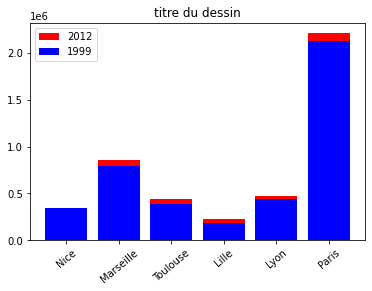

In [ ]:
# Un diagramme en baton serait plus indiqué :
x = [i for i in range(len(lstV))] # abcisses des batons
height = nb_hab12 # hauteur des batons
width = 0.8 # largeur des batons
names = nomVilles # etiquettes en abcisses
plt.bar(x, height, width, color='red' , label="2012") # dessine les batons
height = nb_hab99
plt.bar(x, height, width, color='blue' , label="1999") # dessine les batons

plt.xticks(x, names, rotation=40) # affiche les noms des villes
plt.legend()
plt.title('titre du dessin')
plt.show()

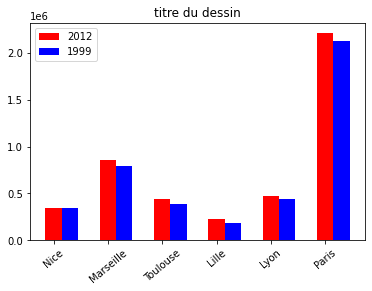

In [ ]:
# Ou des batons cote à cote :
x12 = [i for i in range(len(lstV))] # abcisses des batons
height = nb_hab12 # hauteur des batons
width = 0.3 # largeur des batons
names = nomVilles # etiquettes en abcisses
plt.bar(x12, height, width, color='red' , label="2012") # dessine les batons
x99 = [i+0.3 for i in range(len(lstV))] # abcisses des batons
height = nb_hab99
plt.bar(x99, height, width, color='blue' , label="1999") # dessine les batons

plt.xticks(x12, names, rotation=40) # affiche les noms des villes
plt.legend()
plt.title('titre du dessin')
plt.show()

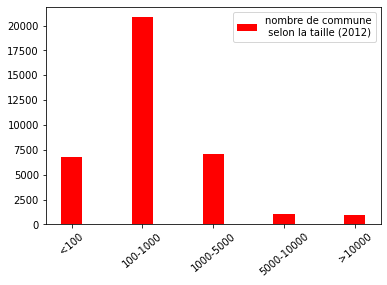

In [ ]:
# un autre :
n100 = len([v['nb_hab_2012'] for v in villes if v['nb_hab_2012'] <= 100])
n1000 = len([v['nb_hab_2012'] for v in villes if 100 <v['nb_hab_2012'] <= 1000])
n5000 = len([v['nb_hab_2012'] for v in villes if 1000 <v['nb_hab_2012'] <= 5000])
n10000 = len([v['nb_hab_2012'] for v in villes if 5000 <v['nb_hab_2012'] <= 10000])
nplus = len([v['nb_hab_2012'] for v in villes if 10000 <v['nb_hab_2012'] ])
x= [1,2,3,4,5]
names = ['<100','100-1000','1000-5000','5000-10000','>10000']
y = [n100,n1000,n5000,n10000,nplus]
plt.bar(x, y, width, color='red' , label="nombre de commune\n selon la taille (2012)") # dessine les batons
plt.xticks(x, names, rotation=40) # affiche les noms des villes
plt.legend()


<center>

---

**Auteur** Jean-Louis Thirot - Mireille Coilhac

Publié sous licence CC BY-NC-SA


---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" width="200" src="https://s2.qwant.com/thumbr/700x0/f/9/436dcce5e02185c0b2e1b0e7a969aa81d7b0438d0a7f2eaee89abb9661b70b/cc-by-nc-sa.svg_.png?u=http%3A%2F%2Fopensiddur.org%2Fwp-content%2Fuploads%2F2011%2F03%2Fcc-by-nc-sa.svg_.png&q=0&b=1&p=0&a=1" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. 